<a href="https://colab.research.google.com/github/aaryanrajput26/Deep-Learning/blob/main/DL_Exp3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, make_moons
from sklearn.model_selection import train_test_split


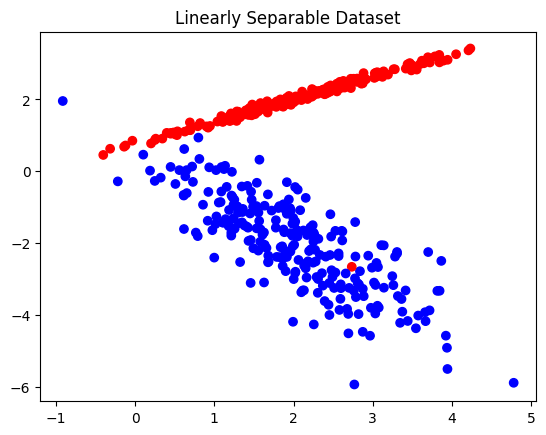

In [2]:
X, y = make_classification(
    n_samples=500,
    n_features=2,
    n_redundant=0,
    n_clusters_per_class=1,
    class_sep=2.0,
    random_state=42
)

y = y.reshape(-1, 1)

plt.scatter(X[:,0], X[:,1], c=y, cmap='bwr')
plt.title("Linearly Separable Dataset")
plt.show()


In [3]:
class Perceptron:
    def __init__(self, lr=0.01, epochs=1000):
        self.lr = lr
        self.epochs = epochs

    def fit(self, X, y):
        self.w = np.zeros((X.shape[1], 1))
        self.b = 0

        for _ in range(self.epochs):
            z = np.dot(X, self.w) + self.b
            y_pred = np.where(z >= 0, 1, 0)

            dw = np.dot(X.T, (y_pred - y)) / len(y)
            db = np.mean(y_pred - y)

            self.w -= self.lr * dw
            self.b -= self.lr * db

    def predict(self, X):
        return np.where(np.dot(X, self.w) + self.b >= 0, 1, 0)


In [4]:
class Perceptron:
    def __init__(self, lr=0.01, epochs=1000):
        self.lr = lr
        self.epochs = epochs

    def fit(self, X, y):
        self.w = np.zeros((X.shape[1], 1))
        self.b = 0

        for _ in range(self.epochs):
            z = np.dot(X, self.w) + self.b
            y_pred = np.where(z >= 0, 1, 0)

            dw = np.dot(X.T, (y_pred - y)) / len(y)
            db = np.mean(y_pred - y)

            self.w -= self.lr * dw
            self.b -= self.lr * db

    def predict(self, X):
        return np.where(np.dot(X, self.w) + self.b >= 0, 1, 0)


In [5]:
perceptron = Perceptron()
perceptron.fit(X, y)

predictions = perceptron.predict(X)
accuracy = np.mean(predictions == y)
print("Perceptron Accuracy (Linear):", accuracy)


Perceptron Accuracy (Linear): 0.99


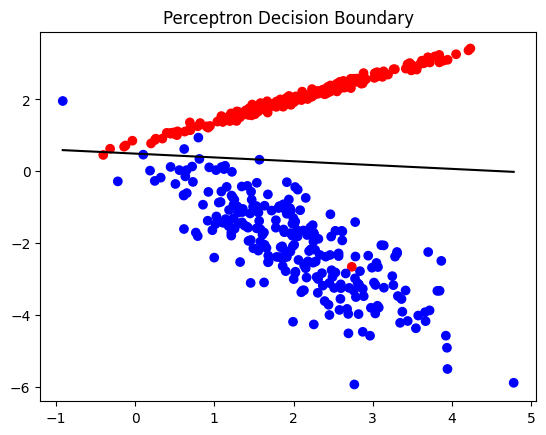

In [6]:
x_vals = np.linspace(X[:,0].min(), X[:,0].max(), 100)
y_vals = -(perceptron.w[0] * x_vals + perceptron.b) / perceptron.w[1]

plt.scatter(X[:,0], X[:,1], c=y, cmap='bwr')
plt.plot(x_vals, y_vals.flatten(), color='black')
plt.title("Perceptron Decision Boundary")
plt.show()


NON-LINEARLY SEPARABLE DATASET


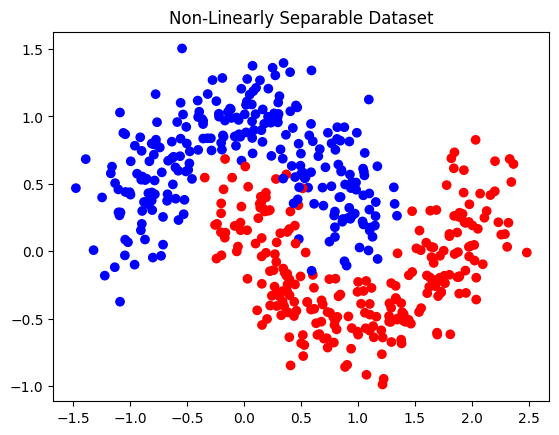

In [7]:
X, y = make_moons(n_samples=500, noise=0.2, random_state=42)
y = y.reshape(-1, 1)

plt.scatter(X[:,0], X[:,1], c=y, cmap='bwr')
plt.title("Non-Linearly Separable Dataset")
plt.show()


In [8]:
perceptron.fit(X, y)
predictions = perceptron.predict(X)

print("Perceptron Accuracy (Non-Linear):", np.mean(predictions == y))


Perceptron Accuracy (Non-Linear): 0.83


In [9]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)


In [10]:
class NeuralNetwork:
    def __init__(self, input_size, hidden_size):
        self.W1 = np.random.randn(input_size, hidden_size)
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, 1)
        self.b2 = np.zeros((1, 1))

    def forward(self, X):
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = sigmoid(self.z1)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.output = sigmoid(self.z2)
        return self.output

    def backward(self, X, y, lr):
        error = self.output - y
        dW2 = np.dot(self.a1.T, error * sigmoid_derivative(self.output))
        db2 = np.sum(error * sigmoid_derivative(self.output), axis=0, keepdims=True)

        d_hidden = np.dot(error, self.W2.T) * sigmoid_derivative(self.a1)
        dW1 = np.dot(X.T, d_hidden)
        db1 = np.sum(d_hidden, axis=0, keepdims=True)

        self.W2 -= lr * dW2
        self.b2 -= lr * db2
        self.W1 -= lr * dW1
        self.b1 -= lr * db1


In [11]:
nn = NeuralNetwork(input_size=2, hidden_size=10)

for epoch in range(5000):
    nn.forward(X)
    nn.backward(X, y, lr=0.01)

predictions = (nn.forward(X) > 0.5).astype(int)
accuracy = np.mean(predictions == y)
print("Neural Network Accuracy (Non-Linear):", accuracy)


Neural Network Accuracy (Non-Linear): 0.984


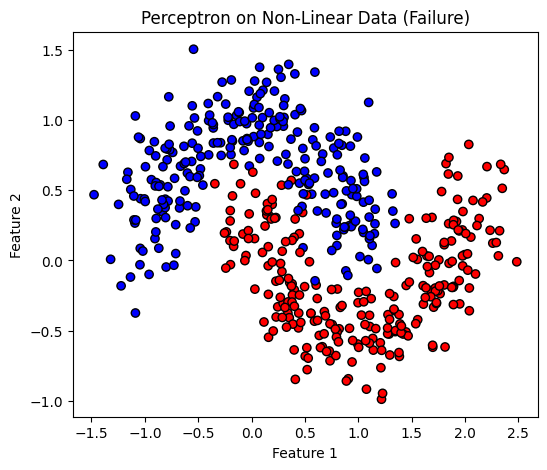

In [15]:
def plot_perceptron_failure(X, y, model):
    plt.figure(figsize=(6,5))
    plt.scatter(X[:,0], X[:,1], c=y, cmap='bwr', edgecolor='k')
    plt.title("Perceptron on Non-Linear Data (Failure)")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()
plot_perceptron_failure(X, y, perceptron)


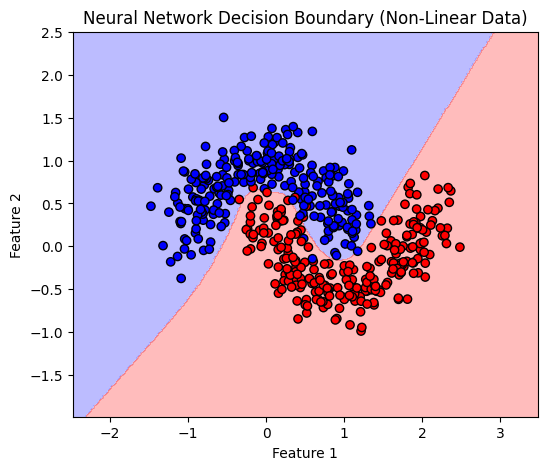

In [16]:
def plot_decision_boundary_nn(X, y, model):
    x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
    y_min, y_max = X[:,1].min()-1, X[:,1].max()+1

    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 300),
        np.linspace(y_min, y_max, 300)
    )

    grid = np.c_[xx.ravel(), yy.ravel()]
    probs = model.forward(grid)
    Z = (probs > 0.5).astype(int)
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(6,5))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='bwr')
    plt.scatter(X[:,0], X[:,1], c=y, cmap='bwr', edgecolor='k')
    plt.title("Neural Network Decision Boundary (Non-Linear Data)")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()
plot_decision_boundary_nn(X, y, nn)

